# Deutsch-Jozsa Algorithm with Qiskit

## Importing necessary libraries 

In [34]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

## Constant Oracle

For the case of constant oracle, the input has no effect on the ouput and so we can randomly flip the output qubit q2 whiich is the qubit |y>

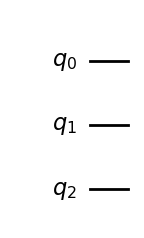

In [35]:
# set the length of the n-bit input register string. 
n = 2 

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2) # Randomly generates 0 and 1 (Random Flips)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

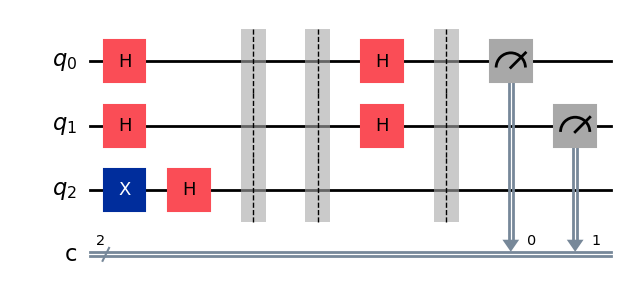

In [36]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.barrier()

# Add oracle
dj_circuit.compose(const_oracle, inplace=True) 
dj_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')


Total counts are: {'00': 1000}


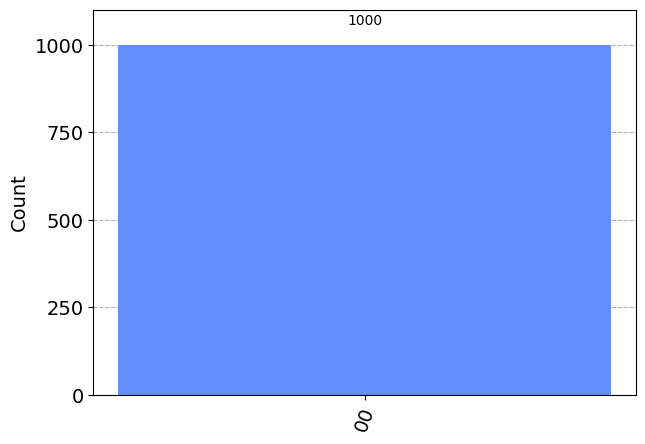

In [37]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
result = backend.run(dj_circuit, shots=1000).result()
counts = result.get_counts(dj_circuit)

# Returns counts
print("\nTotal counts are:",counts)


# Plot a histogram
plot_histogram(counts)

As expected for the Deutsch-Jozsa Algorithm, we get 00 as the measurement output which proves that the oracle chosen is indeed constant function.

## Constant Oracle - General Function

In [38]:
def dj_oracle_const(n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First decide what the fixed output of the oracle will be
    # (either always 0 or always 1)
    output = np.random.randint(2)
    if output == 1:
        oracle_qc.x(n)
    
    oracle_gate_const = oracle_qc.to_gate()
    oracle_gate_const.name = "Oracle Constant" # To show when we display the circuit
    return oracle_gate_const


In [39]:
def dj_algorithm(dj_oracle_const,n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(dj_oracle_const, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit


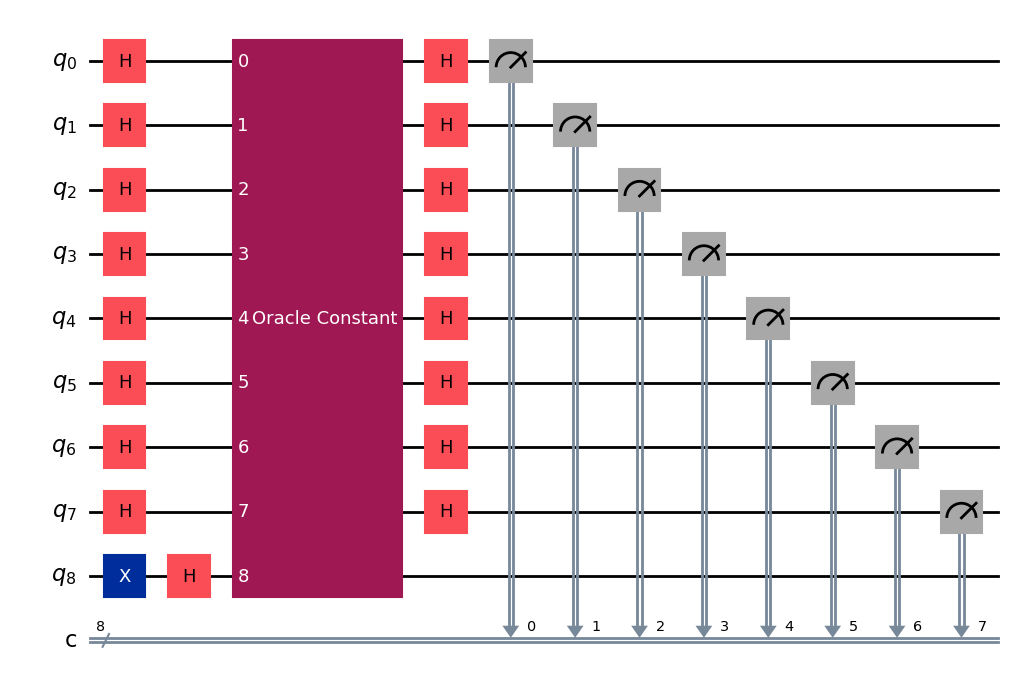

In [40]:
n = 8
oracle_gate_const = dj_oracle_const(n)
dj_circuit = dj_algorithm(oracle_gate_const, n)
dj_circuit.draw('mpl')

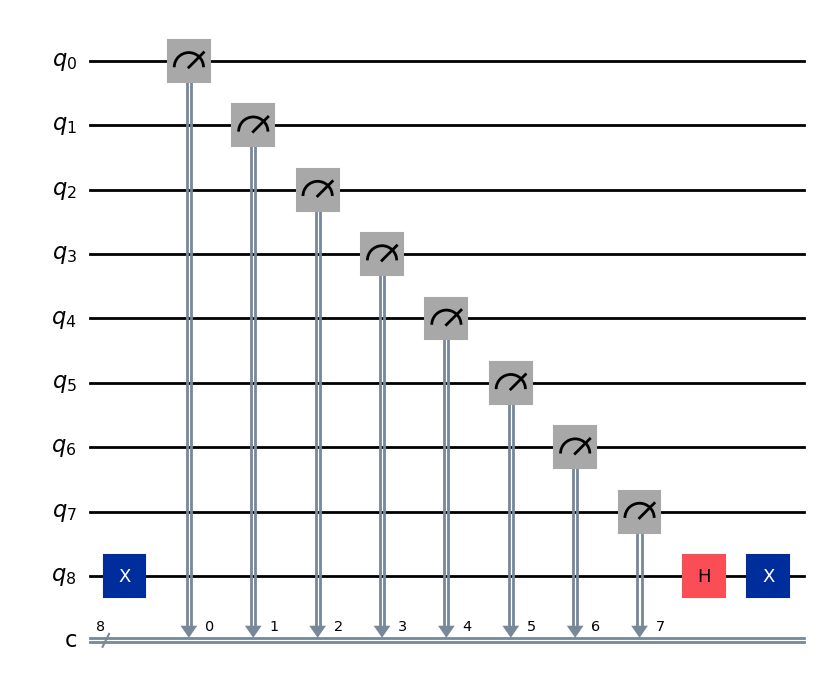

In [42]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

djc_transpiled = transpile(dj_circuit, backend)
djc_transpiled.draw('mpl')


Total counts are: {'00000000': 1000}


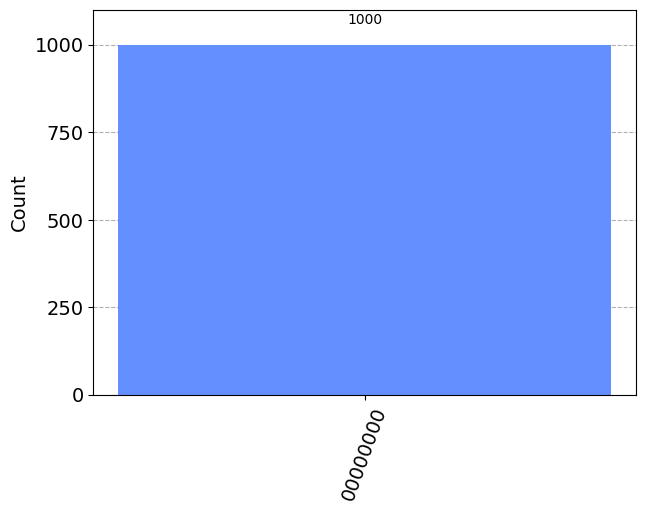

In [41]:

# Execute the circuit on the qasm simulator
result = backend.run(djc_transpiled, shots=1000).result()
counts = result.get_counts(djc_transpiled)

print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Balanced Oracle
If the measurement of the input registers result is not the zero state |00...0>, then the function is balanced. On the other hand if we measure the state |00...0> then the function is constant. 

In [43]:
# set the length of the n-bit input string. 
n = 2

### For Inputs |00>
Inputs are the states q0 and q1 which correspond to the first register and q2 corresponds to the output register. The oracle circuit is shown below.

C:\Users\Elena Jolkver\.conda\envs\quantum\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:267: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: C:\Users\Elena Jolkver\.conda\envs\quantum\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


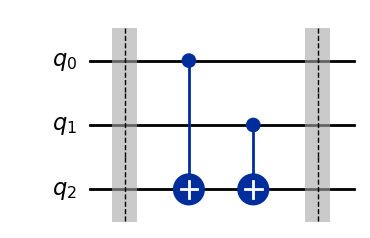

In [44]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "00"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl', style='iqx')

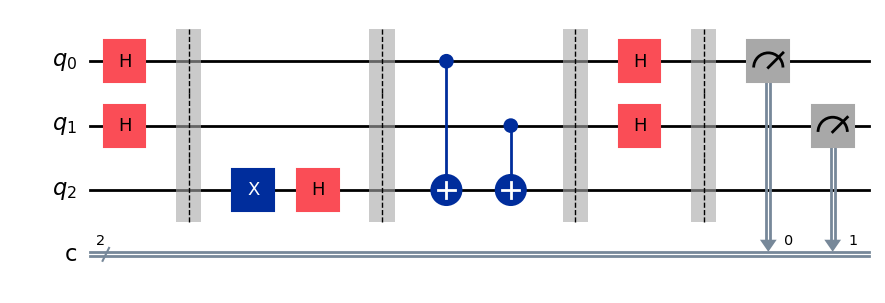

In [45]:
# The Deutsch Jozsa  Full Quantum Circuit 
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()
    
# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl', style='iqx')


Total counts are: {'11': 1000}


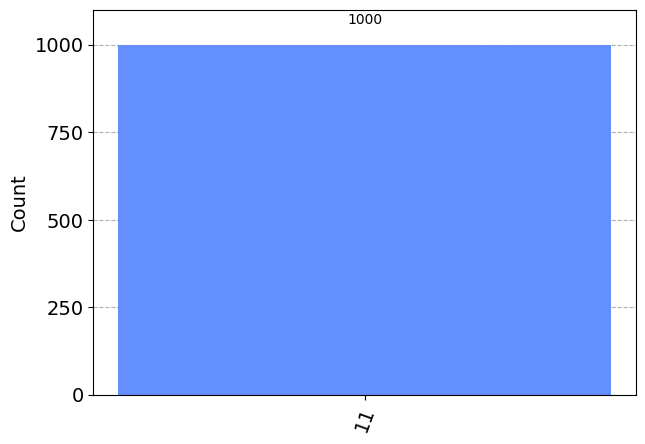

In [46]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

result = backend.run(dj_circuit, shots=1000).result()
counts = result.get_counts(dj_circuit)

# Execute the circuit on the qasm simulator
#job = execute(dj_circuit, backend, shots=1000)

# Grab results from the job
#result = job.result()

# Returns counts
#counts = result.get_counts(dj_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## For Inputs |01>
The oracle circuit is shown below.

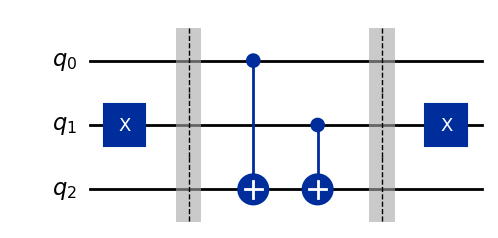

In [47]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "01"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

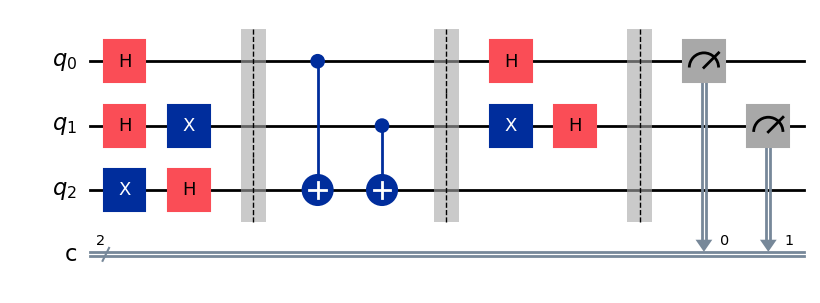

In [48]:
# The Deutsch Jozsa  Full Quantum Circuit 
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')


Total counts are: {'11': 1000}


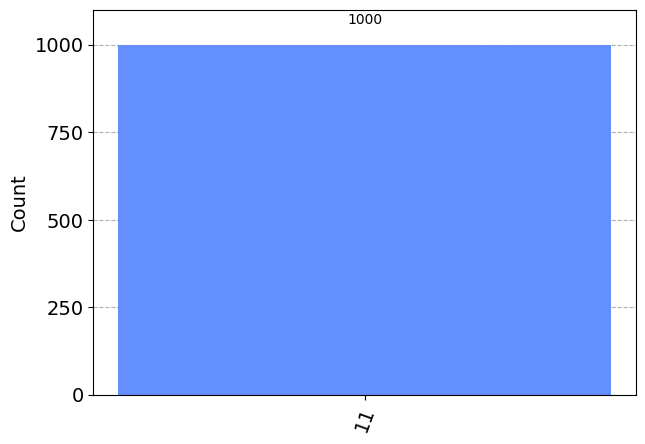

In [49]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
result = backend.run(dj_circuit, shots=1000).result()
counts = result.get_counts(dj_circuit)

print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## For Inputs |10>
The oracle circuit is shown below.

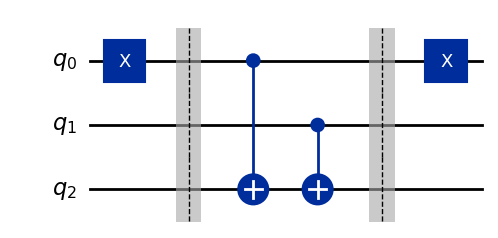

In [50]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "10"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

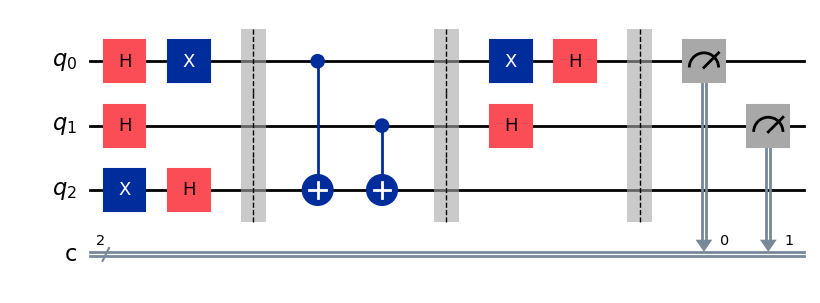

In [51]:
# The Deutsch Jozsa  Full Quantum Circuit 
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')


Total counts are: {'11': 1000}


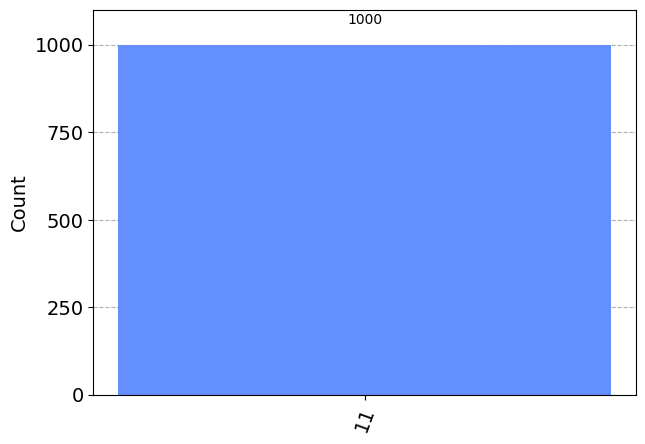

In [52]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

result = backend.run(dj_circuit, shots=1000).result()
counts = result.get_counts(dj_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## For Inputs |11>
The Oracle circuit is shown below

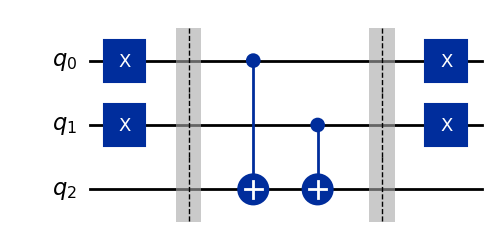

In [53]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "11"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

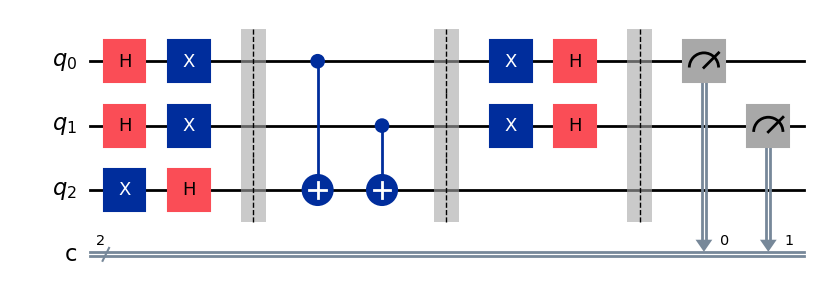

In [54]:
# The Deutsch Jozsa  Full Quantum Circuit 
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit.compose(balanced_oracle, inplace=True)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')


Total counts are: {'11': 1000}


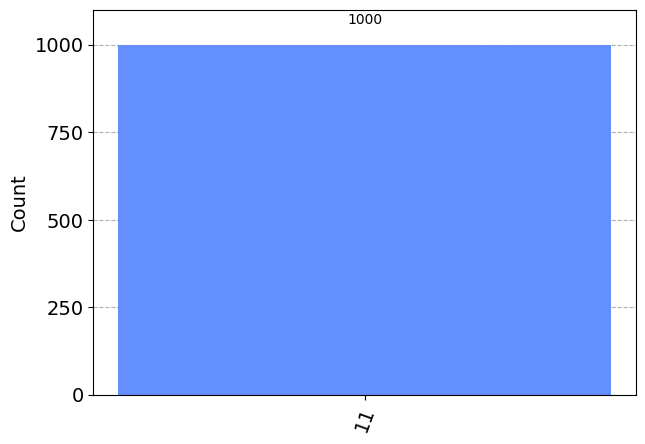

In [55]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
result = backend.run(dj_circuit, shots=1000).result()
counts = result.get_counts(dj_circuit)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

As expected for the Deutsch-Jozsa Algorithm, we get 11 as the measurement output for all the inputs |00>, |01>, |10> and |11> which proves that the oracle chosen is indeed balanced function. 

## Balanced Oracle - General Function

In [56]:
def dj_oracle_balanced(n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First generate a random number that tells us which CNOTs to
    # wrap in X-gates:
    b = np.random.randint(1,2**n)
    
    # Next, format 'b' as a binary string of length 'n', padded with zeros:
    b_str = format(b, '0'+str(n)+'b')
    
    # Next, we place the first X-gates. Each digit in our binary string 
    # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
    # we apply an X-gate to that qubit:
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)
    
    # Do the controlled-NOT gates for each qubit, using the output qubit 
    # as the target:
    for qubit in range(n):
        oracle_qc.cx(qubit, n)
    
    # Next, place the final X-gates
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)

    
    oracle_gate_balanced = oracle_qc.to_gate()
    oracle_gate_balanced.name = "Oracle Balanced" # To show when we display the circuit
    return oracle_gate_balanced

In [57]:
def dj_algorithm(dj_oracle_balanced,n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(dj_oracle_balanced, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

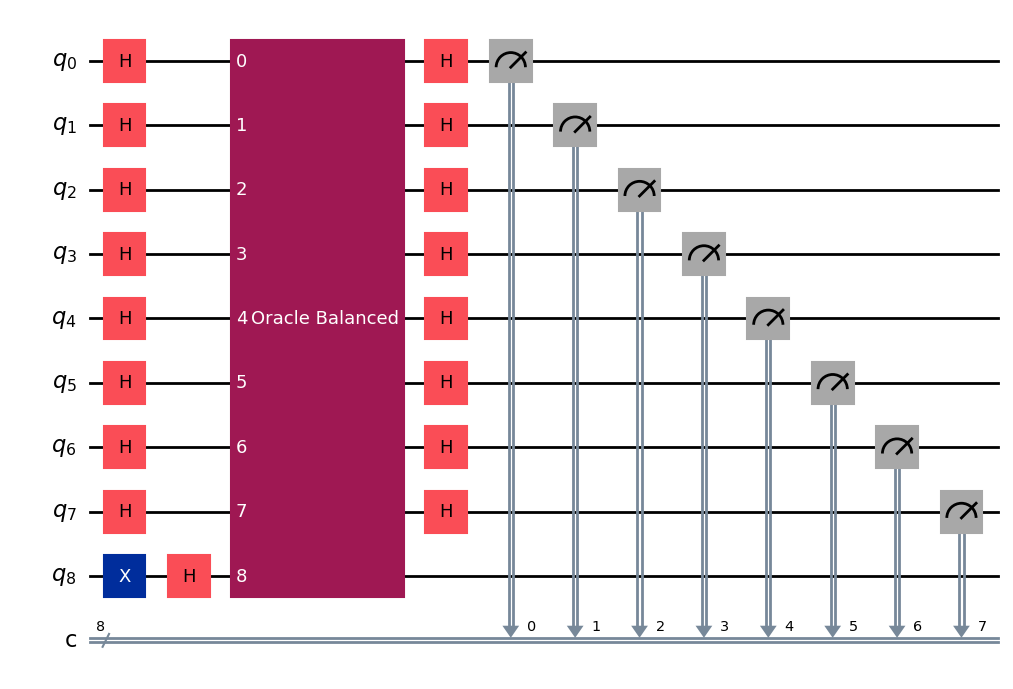

In [58]:
n = 8
oracle_gate_balanced = dj_oracle_balanced(n)
dj_circuit = dj_algorithm(oracle_gate_balanced, n)
dj_circuit.draw('mpl')

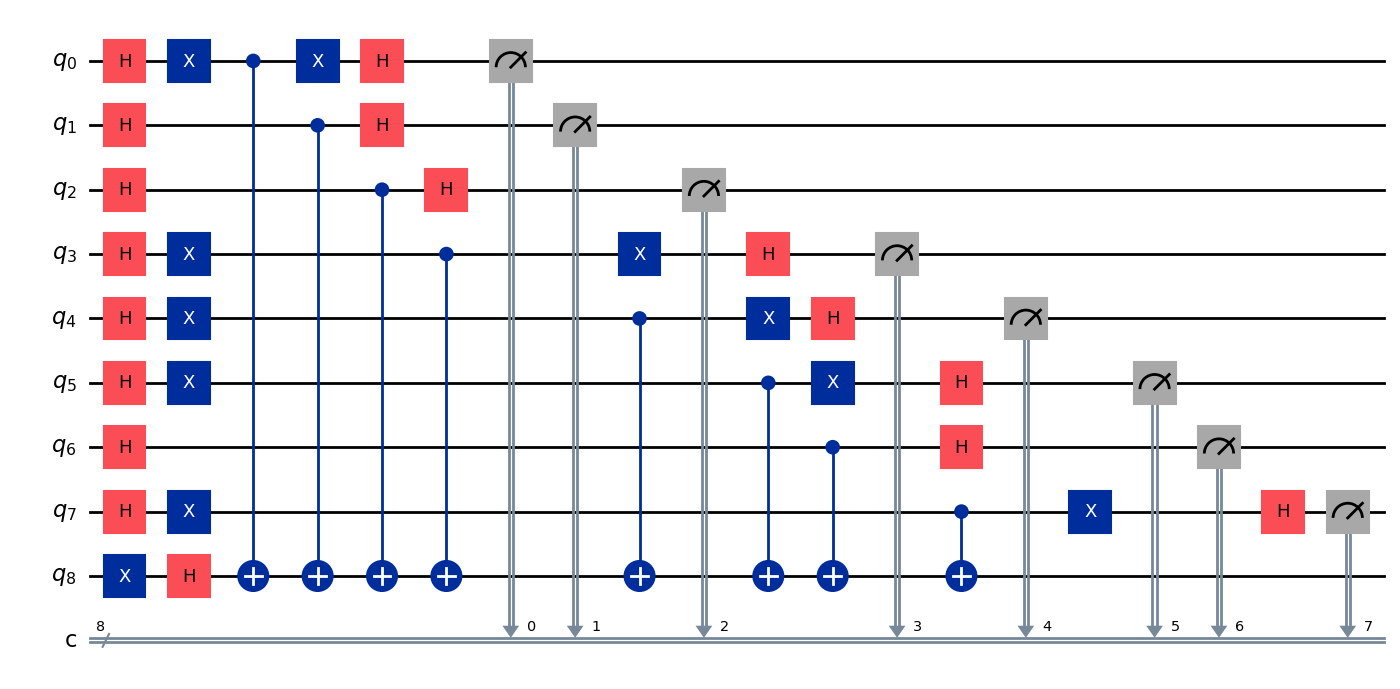

In [59]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

djc_transpiled = transpile(dj_circuit, backend)
djc_transpiled.draw('mpl')


Total counts are: {'11111111': 1000}


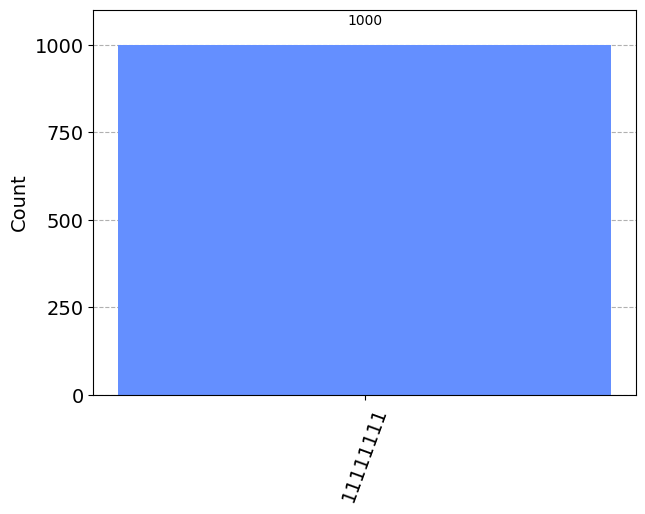

In [60]:
# Execute the circuit on the qasm simulator
result = backend.run(djc_transpiled, shots=1000).result()
counts = result.get_counts(djc_transpiled)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

## Constant + Balanced Combined - General Function

In [61]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate


In [62]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit


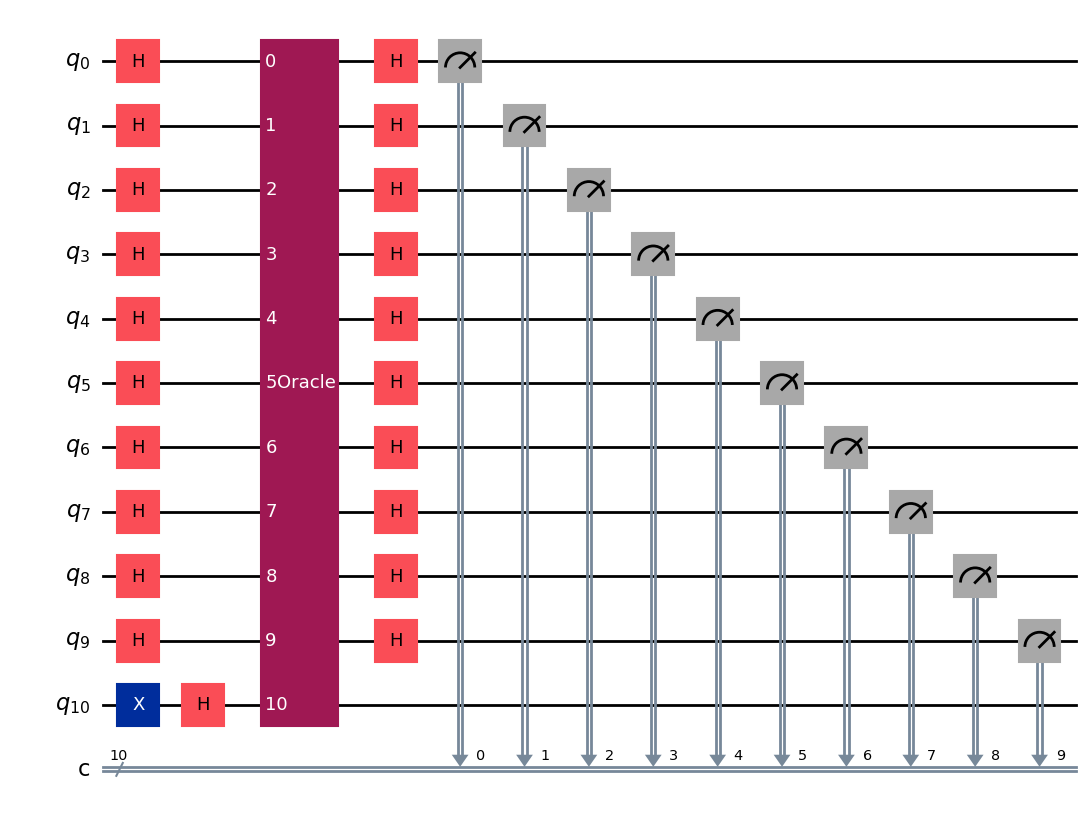

In [63]:
n = 10
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

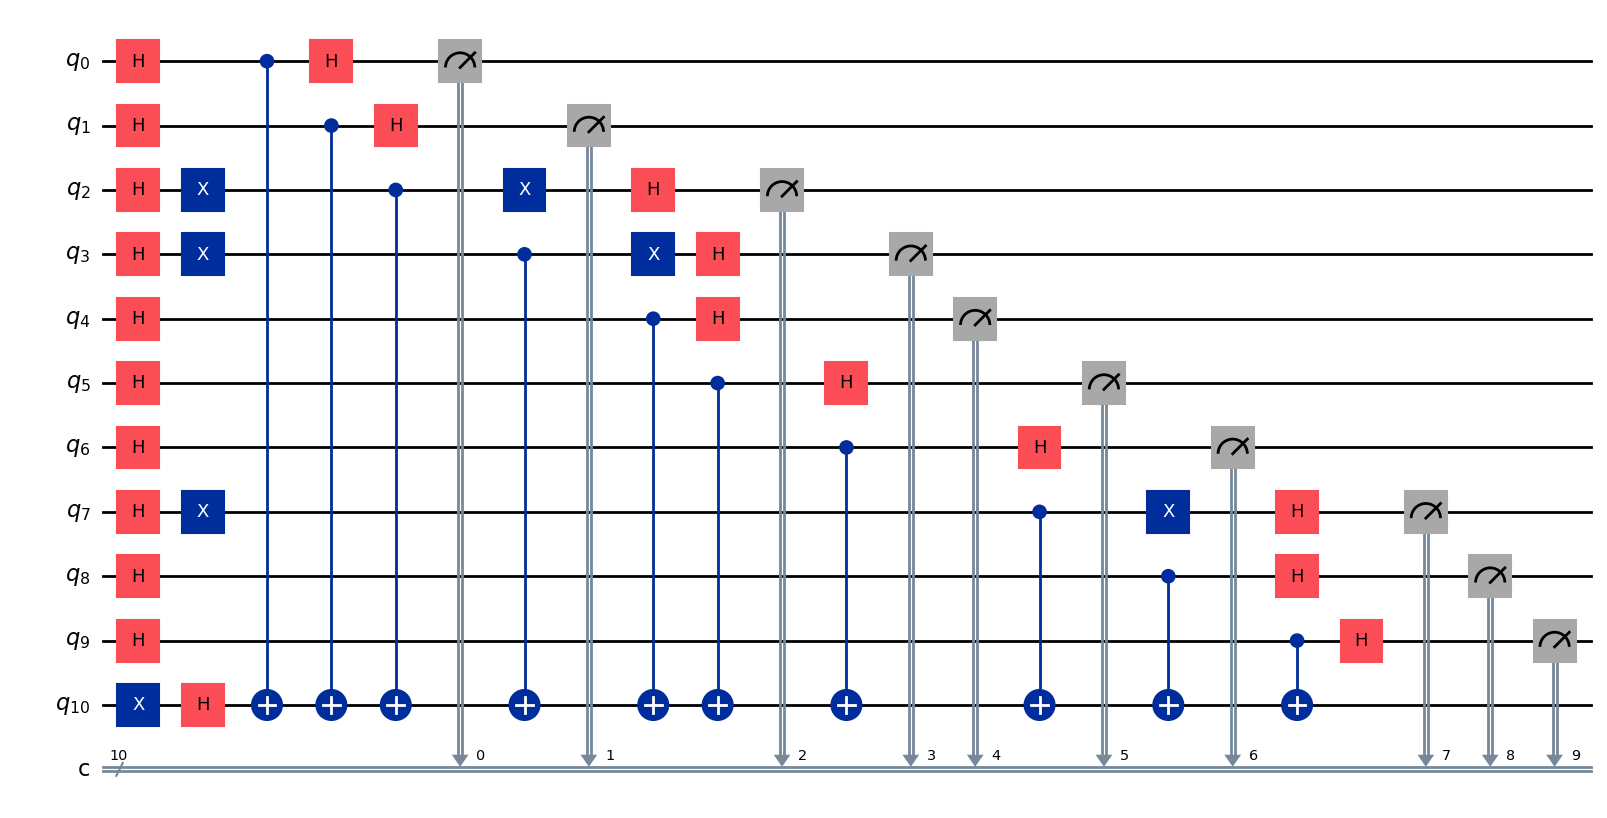

In [65]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')
# Transpile the circuit
djc_transpiled = transpile(dj_circuit, backend)
djc_transpiled.draw('mpl')


Total counts are: {'1111111111': 1000}


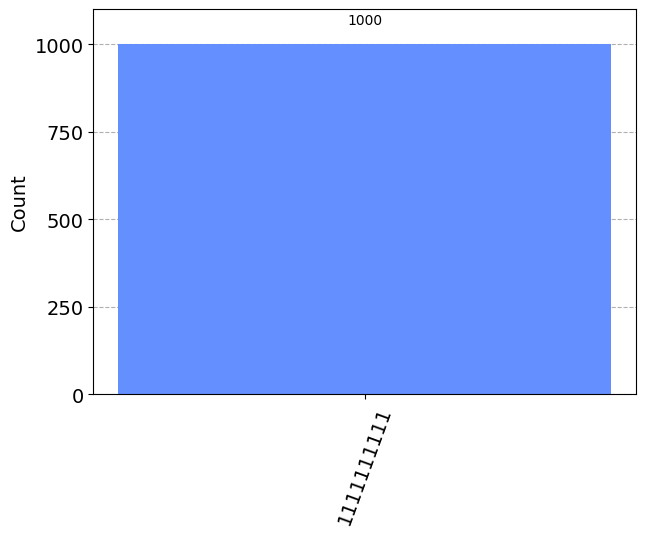

In [66]:
# Execute the circuit on the qasm simulator
result = backend.run(djc_transpiled, shots=1000).result()
counts = result.get_counts(djc_transpiled)
print("\nTotal counts are:",counts)

# Plot a histogram
plot_histogram(counts)

generalized Function. Source: https://hoaio.com/implement-deutsch-jozsa-algorithm-in-qiskit/

In [67]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [33]:
n = 4
oracle_gate = dj_oracle('constant', n)
dj_circuit = dj_algorithm(oracle_gate, n)

# Transpile the circuit
djc_transpiled = transpile(dj_circuit, backend)
djc_transpiled.draw()


┌─┐              
q_0: ─────┤M├──────────────
          └╥┘┌─┐           
q_1: ──────╫─┤M├───────────
           ║ └╥┘┌─┐        
q_2: ──────╫──╫─┤M├────────
           ║  ║ └╥┘┌─┐     
q_3: ──────╫──╫──╫─┤M├─────
     ┌───┐ ║  ║  ║ └╥┘┌───┐
q_4: ┤ X ├─╫──╫──╫──╫─┤ H ├
     └───┘ ║  ║  ║  ║ └───┘
c: 4/══════╩══╩══╩══╩══════
           0  1  2  3

In [ ]:
result = backend.run(djc_transpiled, shots=1000).result()
counts = result.get_counts(djc_transpiled)

plot_histogram(counts)